In [1]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D,Dropout
import matplotlib.pyplot as plt


In [5]:
train_dir_100x100='/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Training'
test_dir_100x100='/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Test'

In [6]:
train_dir_original='/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training'
test_dir_original='/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Test'
val_dir_original='/kaggle/input/fruits/fruits-360_dataset_original-size/fruits-360-original-size/Validation'

In [7]:
train_datagen_100x100=ImageDataGenerator(rescale=1./255,
                                        rotation_range=15,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest',
                                         width_shift_range=0.1,
                                         height_shift_range=0.1)
test_datagen_100x100=ImageDataGenerator(rescale=1./255)
train_datagen_original=ImageDataGenerator(rescale=1./255,
                                        rotation_range=15,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest',
                                         width_shift_range=0.1,
                                         height_shift_range=0.1)
test_datagen_original=ImageDataGenerator(rescale=1./255)
val_datagen_original=ImageDataGenerator(rescale=1./255)

In [8]:
train_generator_100x100=train_datagen_100x100.flow_from_directory(train_dir_100x100,
                                                                 target_size=(100,100),
                                                                 batch_size=10,
                                                                 class_mode='categorical')
test_generator_100x100=test_datagen_100x100.flow_from_directory(test_dir_100x100,
                                                                 target_size=(100,100),
                                                                 batch_size=10,
                                                                 class_mode='categorical')
train_generator_original=train_datagen_original.flow_from_directory(train_dir_original,
                                                                 target_size=(224,224),
                                                                 batch_size=10,
                                                                 class_mode='categorical')
test_generator_original=test_datagen_original.flow_from_directory(test_dir_original,
                                                                 target_size=(224,224),
                                                                 batch_size=10,
                                                                 class_mode='categorical')
val_generator_original=val_datagen_original.flow_from_directory(val_dir_original,
                                                                 target_size=(224,224),
                                                                 batch_size=10,
                                                                 class_mode='categorical')

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.
Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [9]:
def build_VGG16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x=Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [10]:
steps_per_epoch = train_generator_100x100.samples // train_generator_100x100.batch_size
validation_steps = test_generator_100x100.samples // test_generator_100x100.batch_size

In [11]:
input_shape_100x100 = (100, 100, 3)
num_classes_100x100 = train_generator_100x100.num_classes

model_100x100 = build_VGG16_model(input_shape_100x100, num_classes_100x100)

history_100x100 = model_100x100.fit(
    train_generator_100x100,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator_100x100,
    validation_steps=validation_steps,
    epochs=10
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1726011655.969011     108 service.cc:145] XLA service 0x7a3ea800e5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726011655.969088     108 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   3/7049 ━━━━━━━━━━━━━━━━━━━━ 6:17 54ms/step - accuracy: 0.0000e+00 - loss: 5.3544  

I0000 00:00:1726011660.113040     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7048/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4147 - loss: 2.4058

I0000 00:00:1726012315.629106     108 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 8 bytes spill stores, 8 bytes spill loads



7049/7049 ━━━━━━━━━━━━━━━━━━━━ 807s 114ms/step - accuracy: 0.4148 - loss: 2.4055 - val_accuracy: 0.8370 - val_loss: 0.6067
Epoch 2/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 1s 185us/step - accuracy: 0.7000 - loss: 0.8966 - val_accuracy: 0.7778 - val_loss: 0.8393
Epoch 3/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 316s 45ms/step - accuracy: 0.7657 - loss: 0.7459 - val_accuracy: 0.8882 - val_loss: 0.4398
Epoch 4/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.8000 - loss: 0.6611 - val_accuracy: 1.0000 - val_loss: 0.0963
Epoch 5/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 323s 46ms/step - accuracy: 0.8067 - loss: 0.5983 - val_accuracy: 0.8914 - val_loss: 0.4232
Epoch 6/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.9000 - loss: 0.1303 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 7/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 329s 47ms/step - accuracy: 0.8328 - loss: 0.5192 - val_accuracy: 0.8944 - val_loss: 0.4301
Epoch 8/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.7000 - loss: 0.808

In [12]:
loss_100x100, accuracy_100x100 = model_100x100.evaluate(test_generator_100x100)
print(f"100x100 Dataset Test Accuracy: {accuracy_100x100 * 100:.2f}%")

2362/2362 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.9257 - loss: 0.3400
100x100 Dataset Test Accuracy: 92.53%


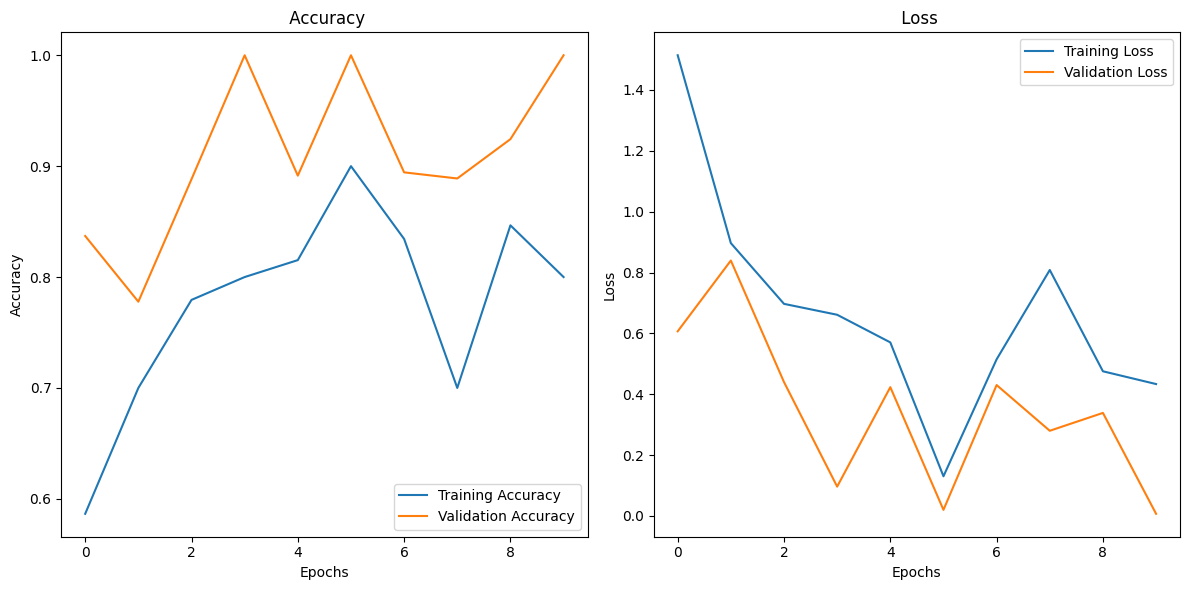

In [13]:
import matplotlib.pyplot as plt
def plot_training_history(history, title):
    acc = history_100x100.history['accuracy']
    val_acc = history_100x100.history['val_accuracy']
    loss = history_100x100.history['loss']
    val_loss = history_100x100.history['val_loss']
    epochs = range(len(acc))
acc = history_100x100.history['accuracy']
val_acc = history_100x100.history['val_accuracy']
loss = history_100x100.history['loss']
val_loss = history_100x100.history['val_loss']
epochs = range(len(acc))
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title(' Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()    
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title(' Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
    
plt.tight_layout()
plt.show()

In [14]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.9.1 requires tensorflow~=2.16.1, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.
tf-keras 2.16.0 requires tensorflo

In [15]:
print(f"Train samples: {train_generator_original.samples}")
print(f"Validation samples: {test_generator_original.samples}")

Train samples: 6231
Validation samples: 3110


In [16]:
steps_per_epoch = train_generator_original.samples // train_generator_original.batch_size
validation_steps = test_generator_original.samples // test_generator_original.batch_size
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

Steps per epoch: 623
Validation steps: 311


In [17]:
for data_batch, labels_batch in train_generator_original:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break

Data batch shape: (10, 224, 224, 3)
Labels batch shape: (10, 24)


In [18]:
validation_steps = test_generator_original.samples // test_generator_original.batch_size
if test_generator_original.samples % test_generator_original.batch_size != 0:
    validation_steps += 1

In [19]:
for batch_index in range(validation_steps):
    data_batch, labels_batch = next(test_generator_original)
    print(f"Batch {batch_index}: Data shape: {data_batch.shape}, Labels shape: {labels_batch.shape}")

Batch 0: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 1: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 2: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 3: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 4: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 5: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 6: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 7: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 8: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 9: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 10: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 11: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 12: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 13: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 14: Data shape: (10, 224, 224, 3), Labels shape: (10, 24)
Batch 15: Data shape: (10, 224, 224, 3), Labels sh

In [20]:
input_shape_original = (224, 224, 3)
num_classes_original = train_generator_original.num_classes

model_original = build_VGG16_model(input_shape_original, num_classes_original)
model_original.compile(optimizer='adam',
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])
steps_per_epoch = train_generator_original.samples // train_generator_original.batch_size
validation_steps = test_generator_original.samples // test_generator_original.batch_size
assert steps_per_epoch > 0, "steps_per_epoch must be greater than 0"
assert validation_steps > 0, "validation_steps must be greater than 0"


import logging
logging.basicConfig(level=logging.DEBUG)



In [21]:
small_train_batch, small_train_labels = next(train_generator_original)
small_test_batch, small_test_labels = next(test_generator_original)

# Check shapes and content of the batch
print(f"Training batch shape: {small_train_batch.shape}, Training labels shape: {small_train_labels.shape}")
print(f"Validation batch shape: {small_test_batch.shape}, Validation labels shape: {small_test_labels.shape}")

Training batch shape: (10, 224, 224, 3), Training labels shape: (10, 24)
Validation batch shape: (10, 224, 224, 3), Validation labels shape: (10, 24)


In [22]:
history_original = model_original.fit(
    small_train_batch,
    small_train_labels,
    validation_data=(small_test_batch, small_test_labels),
    epochs=10,  # Fewer epochs for quick debugging
    verbose=1
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 3.0391 - val_accuracy: 0.0000e+00 - val_loss: 8.0378
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3000 - loss: 1.7101 - val_accuracy: 0.0000e+00 - val_loss: 10.5922
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8000 - loss: 0.8899 - val_accuracy: 0.0000e+00 - val_loss: 14.9391
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6000 - loss: 2.1920 - val_accuracy: 0.0000e+00 - val_loss: 16.3439
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7000 - loss: 0.4061 - val_accuracy: 0.0000e+00 - val_loss: 16.9197
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7000 - loss: 0.9386 - val_accuracy: 0.0000e+00 - val_loss: 16.7171
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9000 - loss: 0.2970 - val_accuracy: 0.0000e+00 - val_loss: 15.8901
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8000 - loss: 0.7577

In [23]:
loss_original, accuracy_original = model_original.evaluate(test_generator_original)
print(f"Original Size Dataset Test Accuracy: {accuracy_original * 100:.2f}%")

311/311 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.1059 - loss: 15.6567
Original Size Dataset Test Accuracy: 9.97%


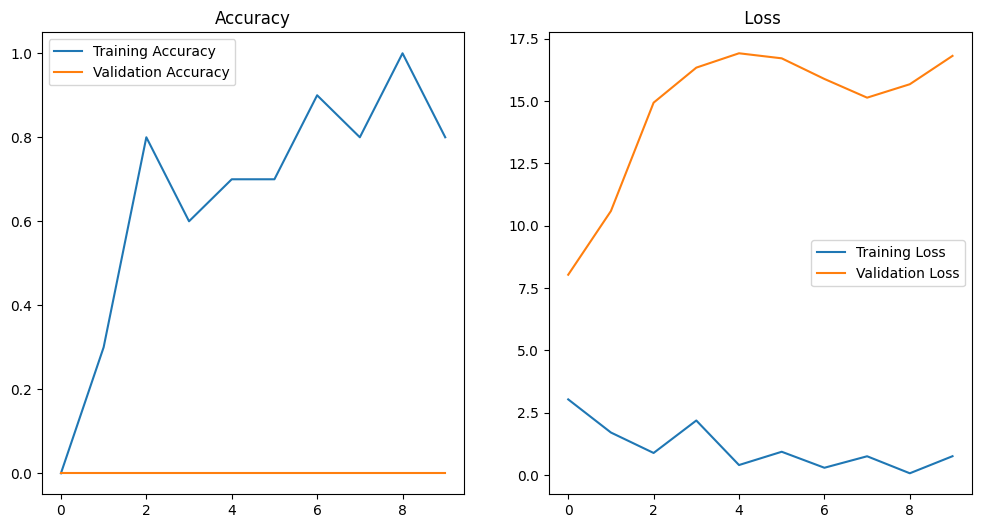

In [24]:
 def plot_training_history(history, title):
    acc = history_original.history['accuracy']
    val_acc = history_original.history['val_accuracy']
    loss = history_original.history['loss']
    val_loss = history_original.history['val_loss']
    epochs = range(len(acc))
acc = history_original.history['accuracy']
val_acc = history_original.history['val_accuracy']
loss = history_original.history['loss']
val_loss = history_original.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title(' Loss')
plt.legend()

plt.show()

In [25]:
def build_VGG19_model(input_shape, num_classes):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x=Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [26]:
input_shape_100x100_19 = (100, 100, 3)
num_classes_100x100_19 = train_generator_100x100.num_classes

model_100x100_19 = build_VGG19_model(input_shape_100x100_19, num_classes_100x100_19)

history_100x100_19 = model_100x100_19.fit(
    train_generator_100x100,
    steps_per_epoch=train_generator_100x100.samples // train_generator_100x100.batch_size,
    validation_data=test_generator_100x100,
    validation_steps=test_generator_100x100.samples // test_generator_100x100.batch_size,
    epochs=10
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
7047/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3818 - loss: 2.5663

I0000 00:00:1726014316.167366     109 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 8 bytes spill stores, 8 bytes spill loads



7049/7049 ━━━━━━━━━━━━━━━━━━━━ 344s 48ms/step - accuracy: 0.3819 - loss: 2.5659 - val_accuracy: 0.7964 - val_loss: 0.8078
Epoch 2/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.6000 - loss: 1.3976 - val_accuracy: 1.0000 - val_loss: 0.1031
Epoch 3/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 333s 47ms/step - accuracy: 0.7340 - loss: 0.8575 - val_accuracy: 0.8343 - val_loss: 0.6076
Epoch 4/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.7000 - loss: 0.8116 - val_accuracy: 0.7778 - val_loss: 0.7312
Epoch 5/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 332s 47ms/step - accuracy: 0.7817 - loss: 0.6833 - val_accuracy: 0.8726 - val_loss: 0.5012
Epoch 6/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.7000 - loss: 1.0101 - val_accuracy: 0.8889 - val_loss: 0.1298
Epoch 7/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 335s 47ms/step - accuracy: 0.8025 - loss: 0.6172 - val_accuracy: 0.8689 - val_loss: 0.5068
Epoch 8/10
7049/7049 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7000 - loss: 1.3679

In [27]:
loss_100x100_19, accuracy_100x100_19 = model_100x100_19.evaluate(test_generator_100x100)
print(f"100x100_19 Dataset Test Accuracy: {accuracy_100x100_19 * 100:.2f}%")

2362/2362 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8727 - loss: 0.5237
100x100_19 Dataset Test Accuracy: 87.39%


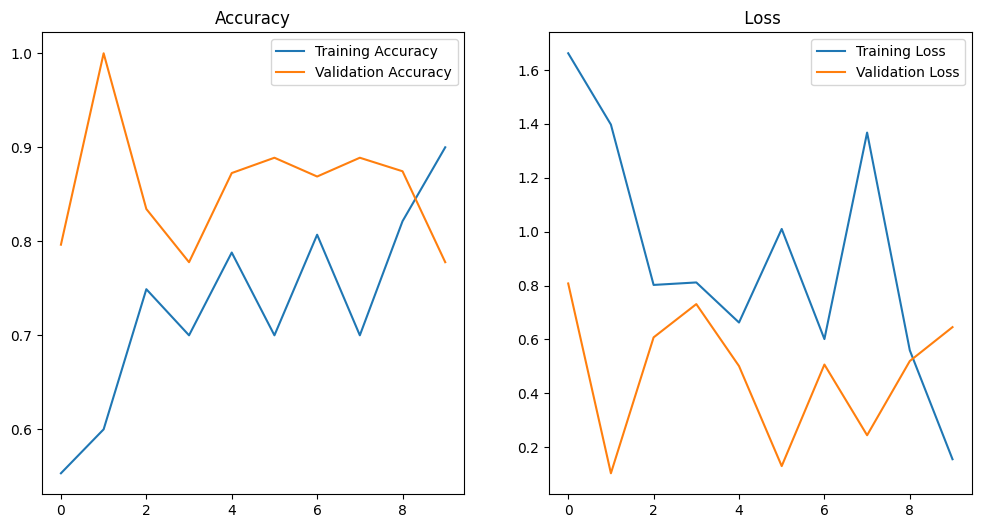

In [28]:
def plot_training_history(history, title):
    acc = history_100x100_19.history['accuracy']
    val_acc = history_100x100_19.history['val_accuracy']
    loss = history_100x100_19.history['loss']
    val_loss = history_100x100_19.history['val_loss']
    epochs = range(len(acc))
acc = history_100x100_19.history['accuracy']
val_acc = history_100x100_19.history['val_accuracy']
loss = history_100x100_19.history['loss']
val_loss = history_100x100_19.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title(' Loss')
plt.legend()

plt.show()

In [29]:
validation_steps = test_generator_original.samples // test_generator_original.batch_size
if test_generator_original.samples % test_generator_original.batch_size != 0:
    validation_steps += 1

In [30]:
small_train_batch, small_train_labels = next(train_generator_original)
small_test_batch, small_test_labels = next(test_generator_original)

# Check shapes and content of the batch
print(f"Training batch shape: {small_train_batch.shape}, Training labels shape: {small_train_labels.shape}")
print(f"Validation batch shape: {small_test_batch.shape}, Validation labels shape: {small_test_labels.shape}")

Training batch shape: (10, 224, 224, 3), Training labels shape: (10, 24)
Validation batch shape: (10, 224, 224, 3), Validation labels shape: (10, 24)


In [31]:
steps_per_epoch = train_generator_original.samples // train_generator_original.batch_size
validation_steps = test_generator_original.samples // test_generator_original.batch_size
assert steps_per_epoch > 0, "steps_per_epoch must be greater than 0"
assert validation_steps > 0, "validation_steps must be greater than 0"


import logging
logging.basicConfig(level=logging.DEBUG)

In [32]:
small_train_batch, small_train_labels = next(train_generator_original)
small_test_batch, small_test_labels = next(test_generator_original)

# Check shapes and content of the batch
print(f"Training batch shape: {small_train_batch.shape}, Training labels shape: {small_train_labels.shape}")
print(f"Validation batch shape: {small_test_batch.shape}, Validation labels shape: {small_test_labels.shape}")

Training batch shape: (10, 224, 224, 3), Training labels shape: (10, 24)
Validation batch shape: (10, 224, 224, 3), Validation labels shape: (10, 24)


In [33]:
input_shape_original_19 = (224, 224, 3)
num_classes_original_19 = train_generator_original.num_classes

model_original_19 = build_VGG19_model(input_shape_original_19, num_classes_original_19)

history_original_19 = model_original_19.fit(
    small_train_batch,
    small_train_labels,
    validation_data=(small_test_batch, small_test_labels),
    epochs=10,  # Fewer epochs for quick debugging
    verbose=1
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 3.9095 - val_accuracy: 0.1000 - val_loss: 7.1019
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.4000 - loss: 2.2205 - val_accuracy: 0.0000e+00 - val_loss: 10.1102
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7000 - loss: 1.7398 - val_accuracy: 0.2000 - val_loss: 9.3897
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8000 - loss: 1.5682 - val_accuracy: 0.2000 - val_loss: 10.3704
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8000 - loss: 1.3264 - val_accuracy: 0.2000 - val_loss: 11.6994
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8000 - loss: 0.3475 - val_accuracy: 0.2000 - val_loss: 12.1824
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9000 - loss: 0.1799 - val_accuracy: 0.3000 - val_loss: 11.5591
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.1053 - val_accuracy: 0.4000 -

In [34]:
loss_original_19, accuracy_original_19 = model_original_19.evaluate(test_generator_original)
print(f"Original_19 Size Dataset Test Accuracy: {accuracy_original_19 * 100:.2f}%")

311/311 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.1295 - loss: 15.8770
Original_19 Size Dataset Test Accuracy: 12.28%


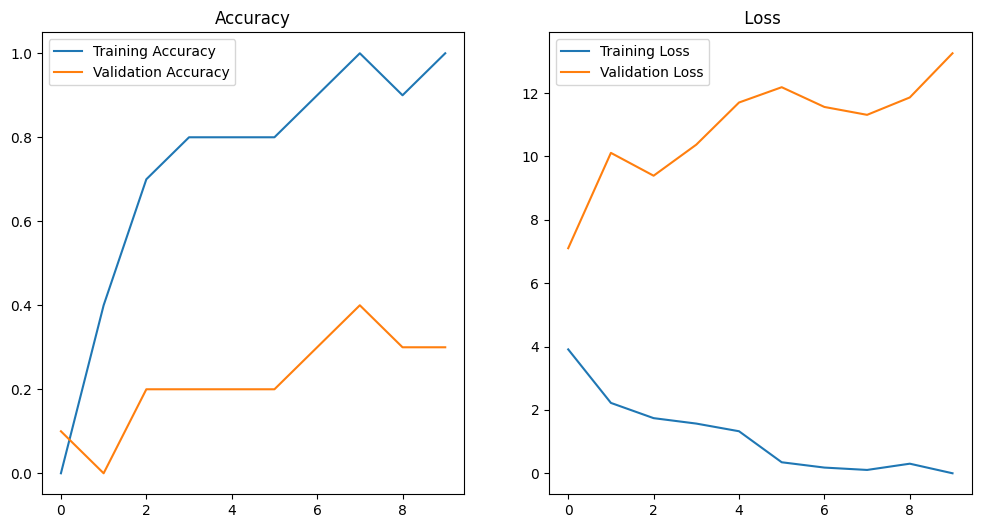

In [35]:
 def plot_training_history(history, title):
    acc = history_original_19.history['accuracy']
    val_acc = history_original_19.history['val_accuracy']
    loss = history_original_19.history['loss']
    val_loss = history_original_19.history['val_loss']
    epochs = range(len(acc))
acc = history_original_19.history['accuracy']
val_acc = history_original_19.history['val_accuracy']
loss = history_original_19.history['loss']
val_loss = history_original_19.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title(' Loss')
plt.legend()

plt.show()

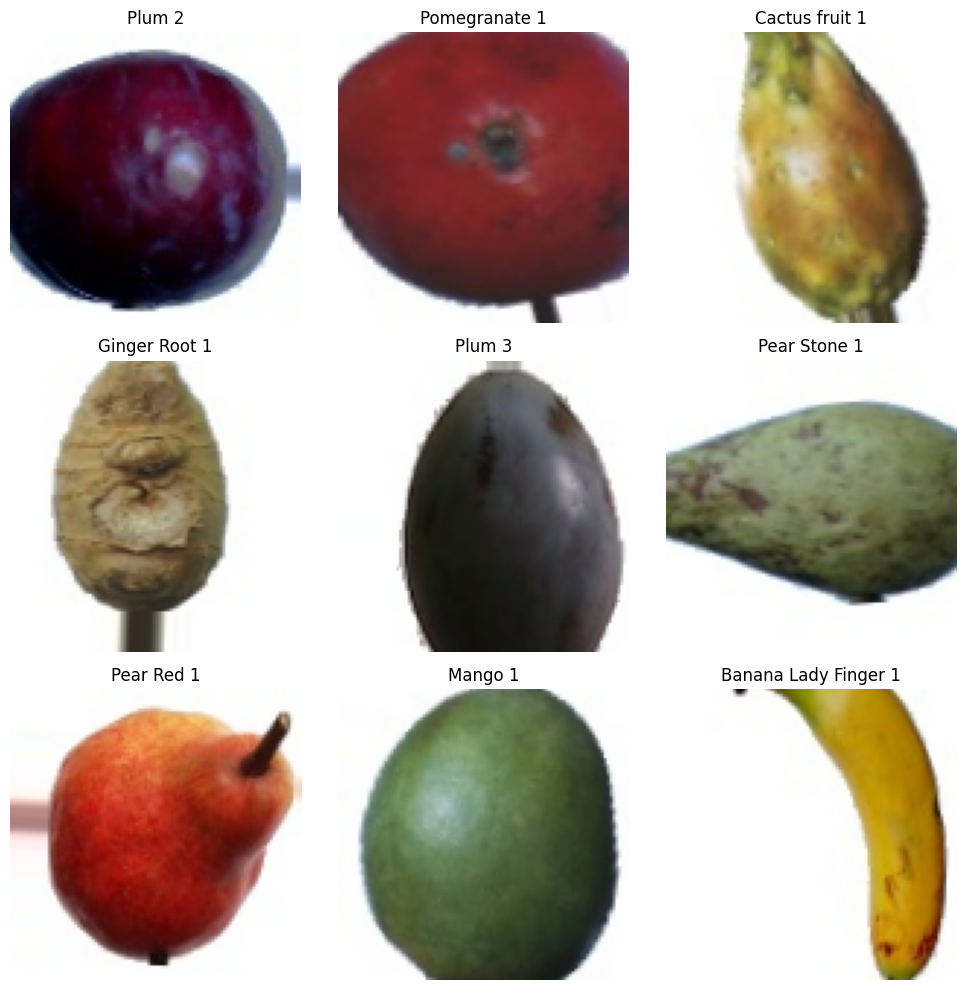

In [36]:
def visualize_images_from_generator(generator, num_images=9):
    images, labels = next(generator)
    
    class_labels = {v: k for k, v in generator.class_indices.items()}
    
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_labels[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_images_from_generator(train_generator_100x100)

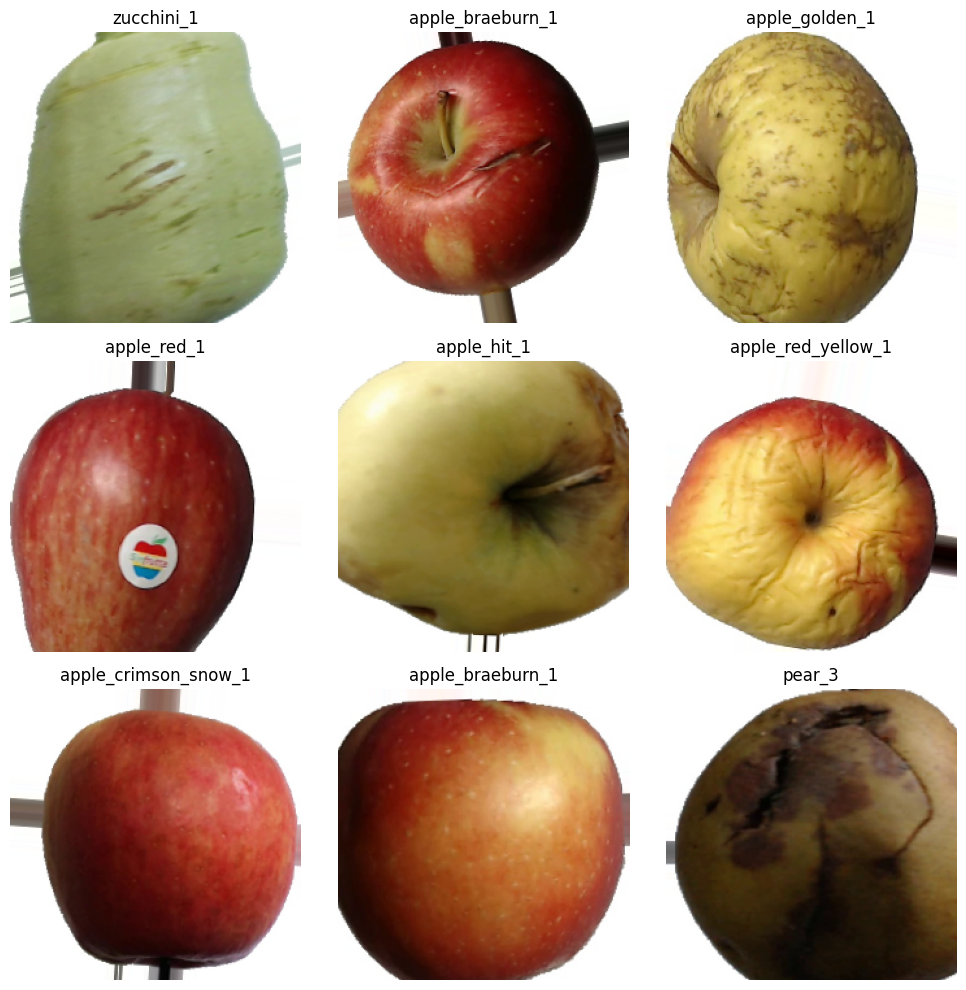

In [37]:
def visualize_images_from_generator(generator, num_images=9):
    images, labels = next(generator)
    
    class_labels = {v: k for k, v in generator.class_indices.items()}
    
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_labels[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_images_from_generator(train_generator_original)